# Data analysis and visulisation 

### Summary 

Once I had cleaned the data and was happy it was something I could work with, I was then able to analyse and gain a better understanding of a number of key features that I felt that would have the biggest impact on the price of an AirBnB listing.

The first and most important feature that I needed to understand was Price as this is my predicter variable. As I found during my data cleaning, the biggests issues was the distribution of the data. Price was a Pareto Distribution, where the large number of values are towards the lower end however the range is effected by the small number of high price. This would mean that I would have to log transform the data so it could be modeled on. 

Due to the large number of features I was not going to be able to analyses all of them, so I instead analysed features that traditionaly had the highest impact on houses prices. Although there is not a direct correlation between house price and rental price, I beleive this was the best way to get the most out of my early analysis.

From my analysis the major factors that can be extracted are that most Airbnb properties in London are located centrally and have either 2 and 4 bedrooms. There is a wide range of properties but the most common where Apartment and houses, with most accomdating between 1-4 people. 

A few of the features are correalted together, but these are to be expected as bedrooms and accomodates for example are always going to be correlated. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
test_df = pd.read_csv('../test_AirBnB' )

In [3]:
test_df.columns

Index(['Unnamed: 0', 'experiences_offered', 'host_is_superhost',
       'host_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'calculated_host_listings_count'],
      dtype='object')

# Predictor Varaible

Price is my predictor varaible so need to have a closer look at the data to ensure that I have a good understanding of it. 

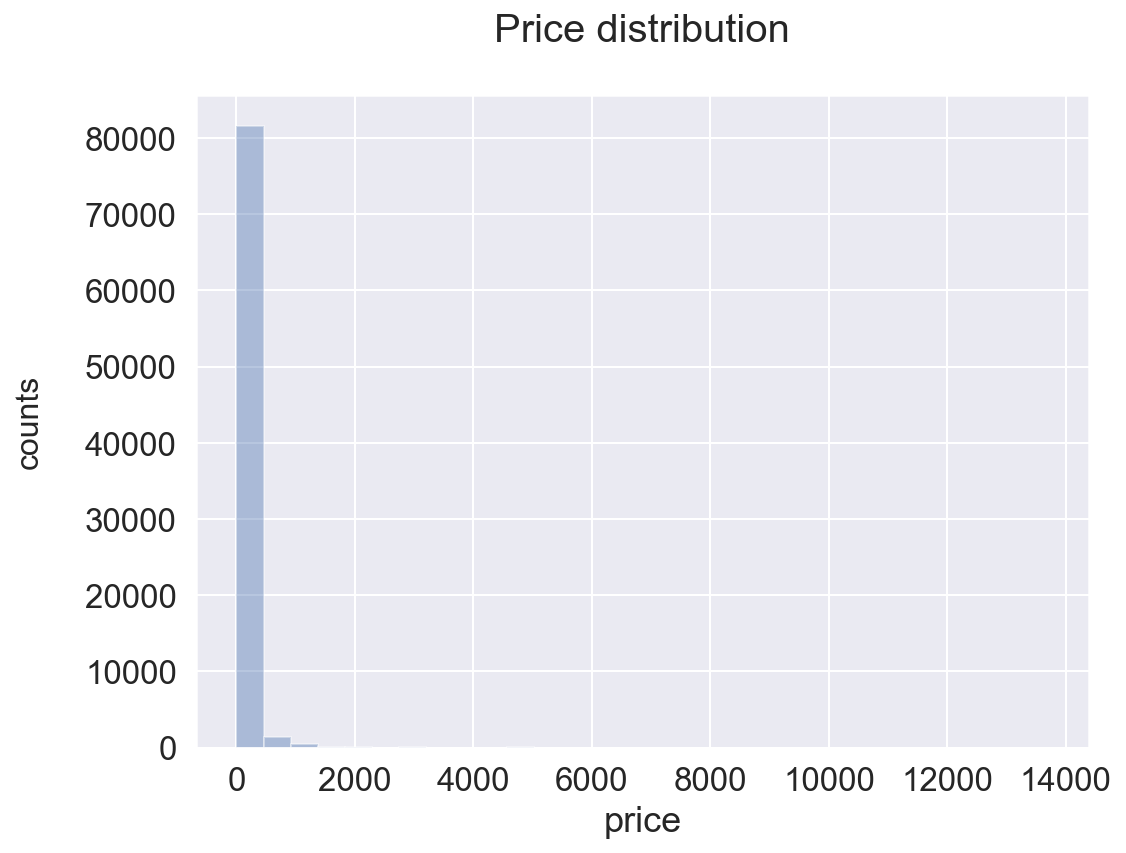

In [44]:
#distiribution of the price data
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(test_df['price'], bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Price distribution\n', fontsize=20)
plt.savefig("../Capstone_Images/price_dist.png", dpi=200, bbox_inches="tight")
plt.show()

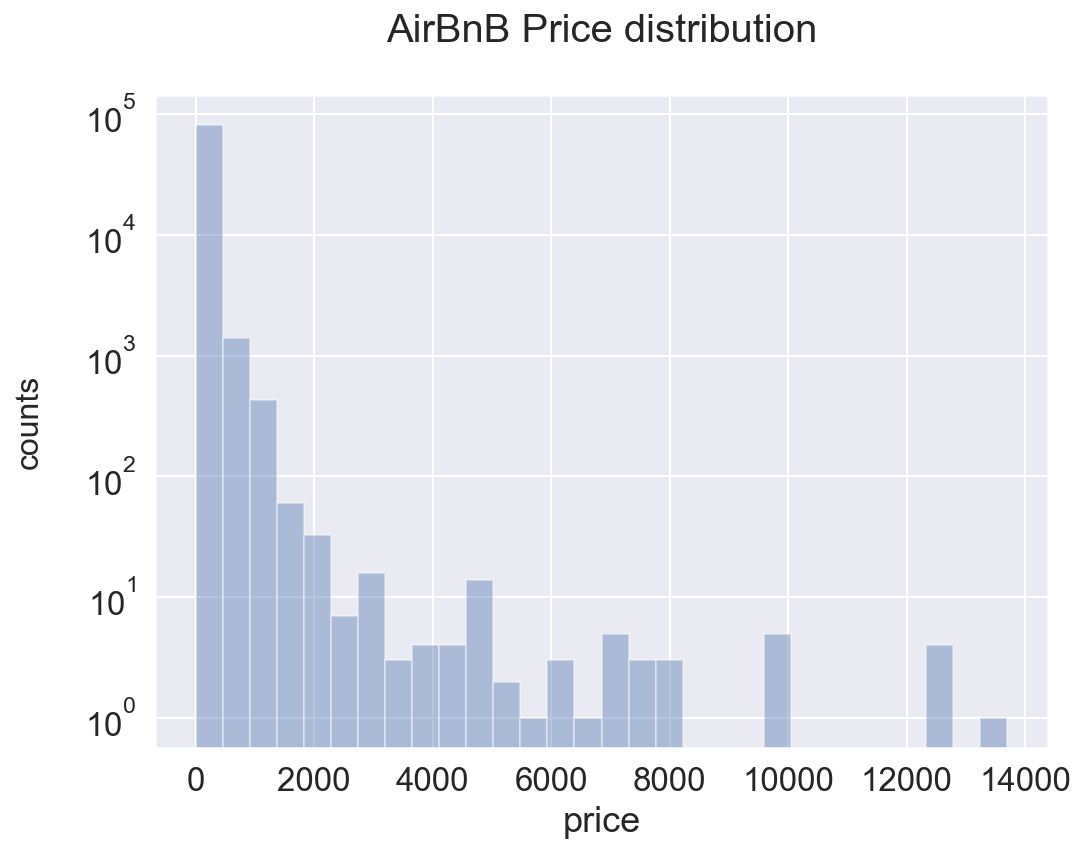

In [45]:
# log of the price data

fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(test_df['price'], bins=30, hist=True, kde=False,
             ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('AirBnB Price distribution\n', fontsize=20)
plt.yscale('log')
plt.savefig("../Capstone_Images/price_dist_2.png", dpi=200, bbox_inches="tight")
plt.show()

In [6]:
test_df.price.describe()

count    83553.000000
mean       121.552751
std        224.594849
min          0.000000
25%         45.000000
50%         81.000000
75%        140.000000
max      13700.000000
Name: price, dtype: float64

This is a Pareto Distribution, where the large number of values are towards the lower end however the range is effected by the small number of high price. 

As the data is not normally distributed I will have to log transform this to perform linear regression models.

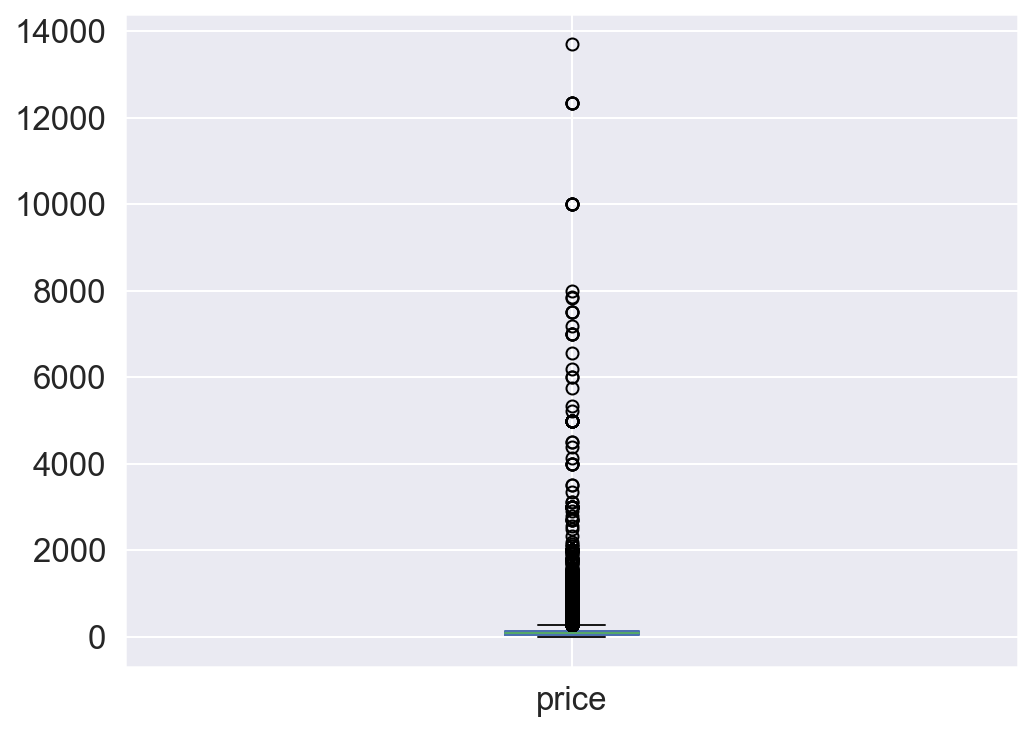

In [46]:
test_df.price.plot(kind='box', figsize=(8,6))
plt.savefig("../Capstone_Images/price_box.png", dpi=200, bbox_inches="tight")
plt.show()

# Features

Below is intial analysis of features that I believe will have an impact on the listing price.

## Neighbourhood data

At first thought, I believe the location of the property will have an impact on the price of the listing.

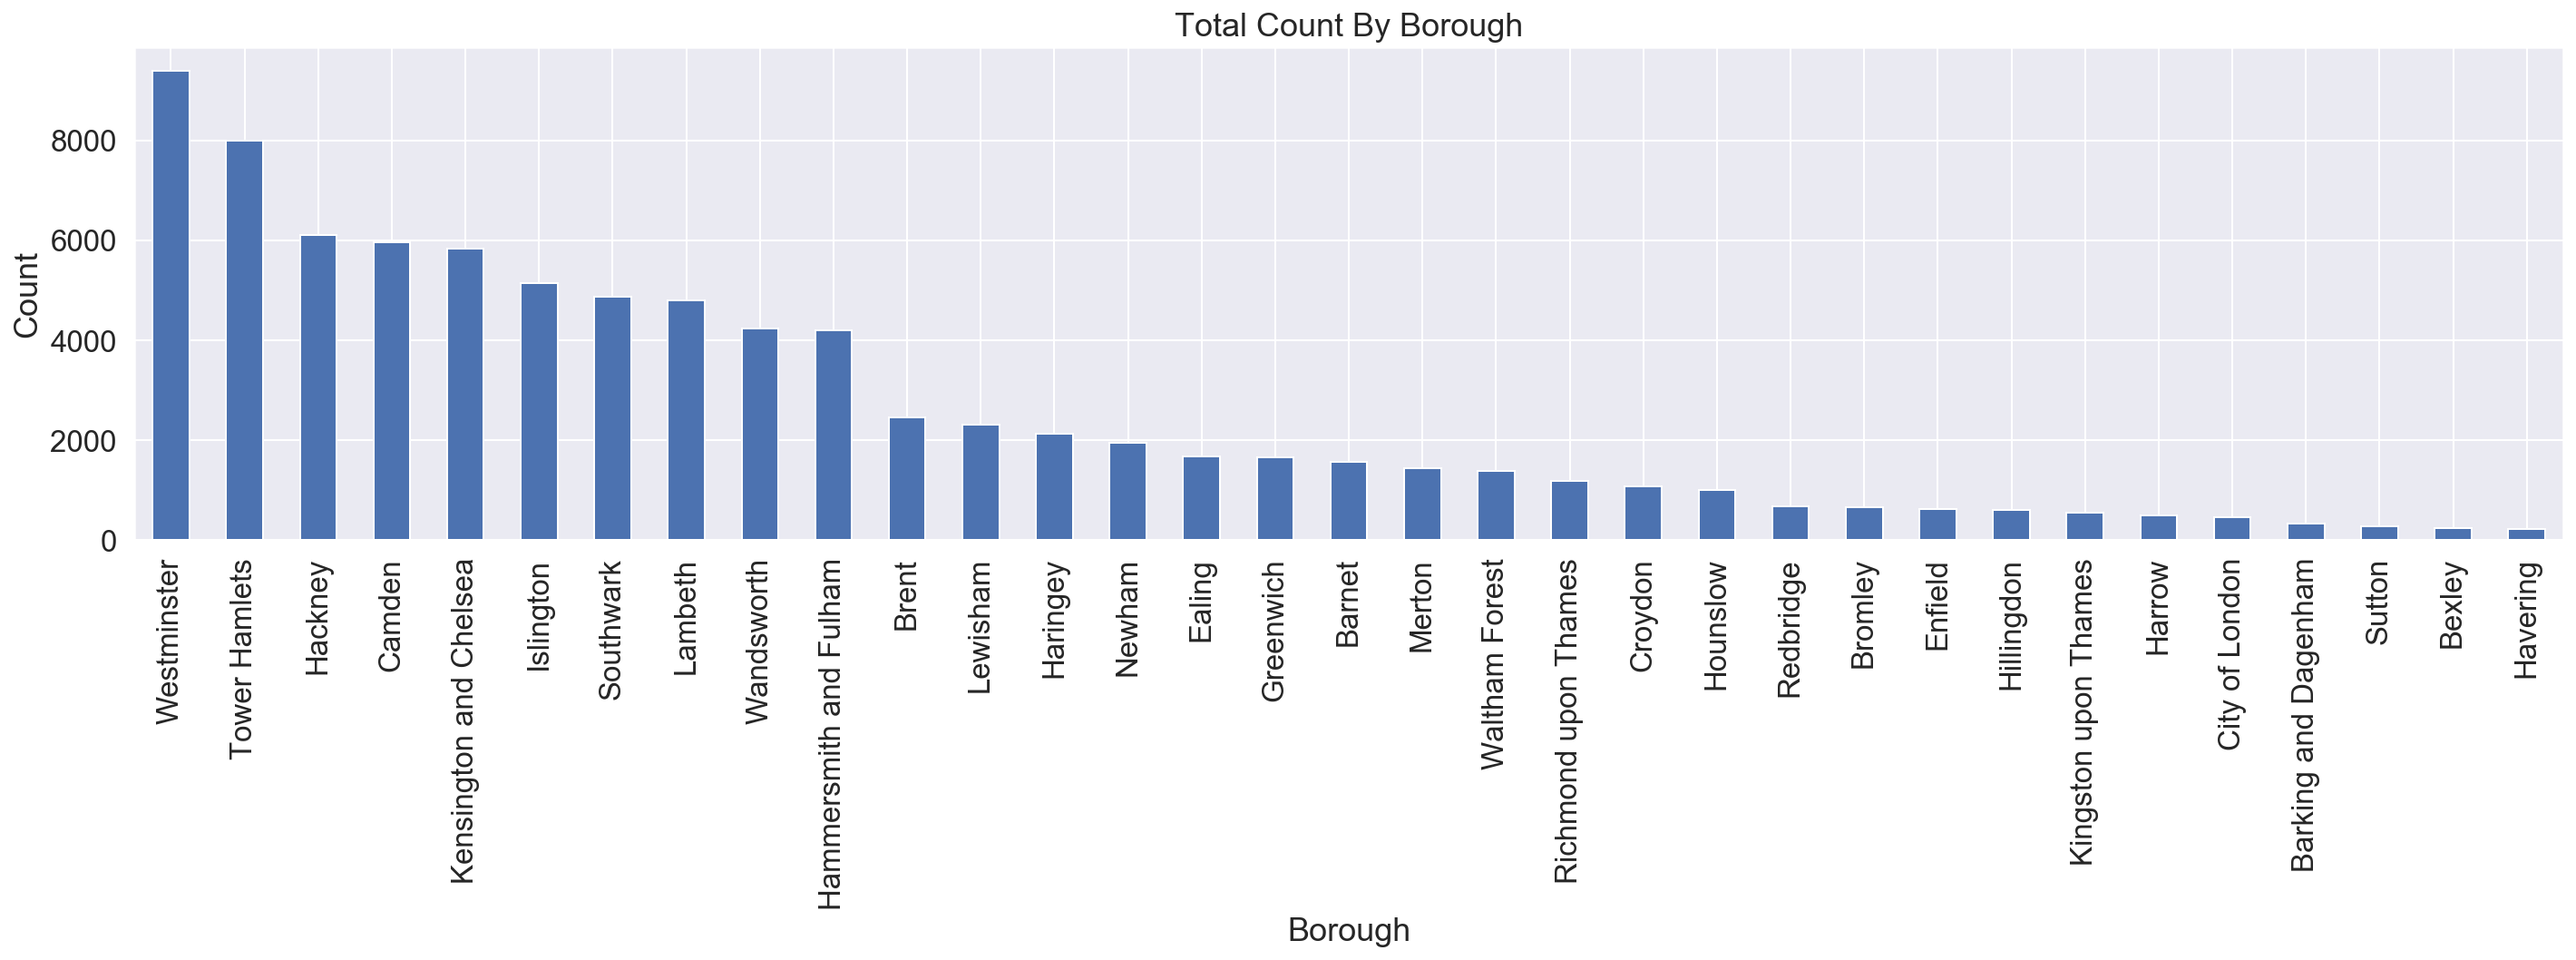

In [18]:
test_df.neighbourhood_cleansed.value_counts().plot(kind='bar', figsize=(24,5))
plt.title("Total Count By Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.savefig("../Capstone_Images/Borough_Count.png", dpi=200, bbox_inches="tight")
plt.show()

In [45]:
mapping_df = pd.read_csv('../listings (1) 2.csv')

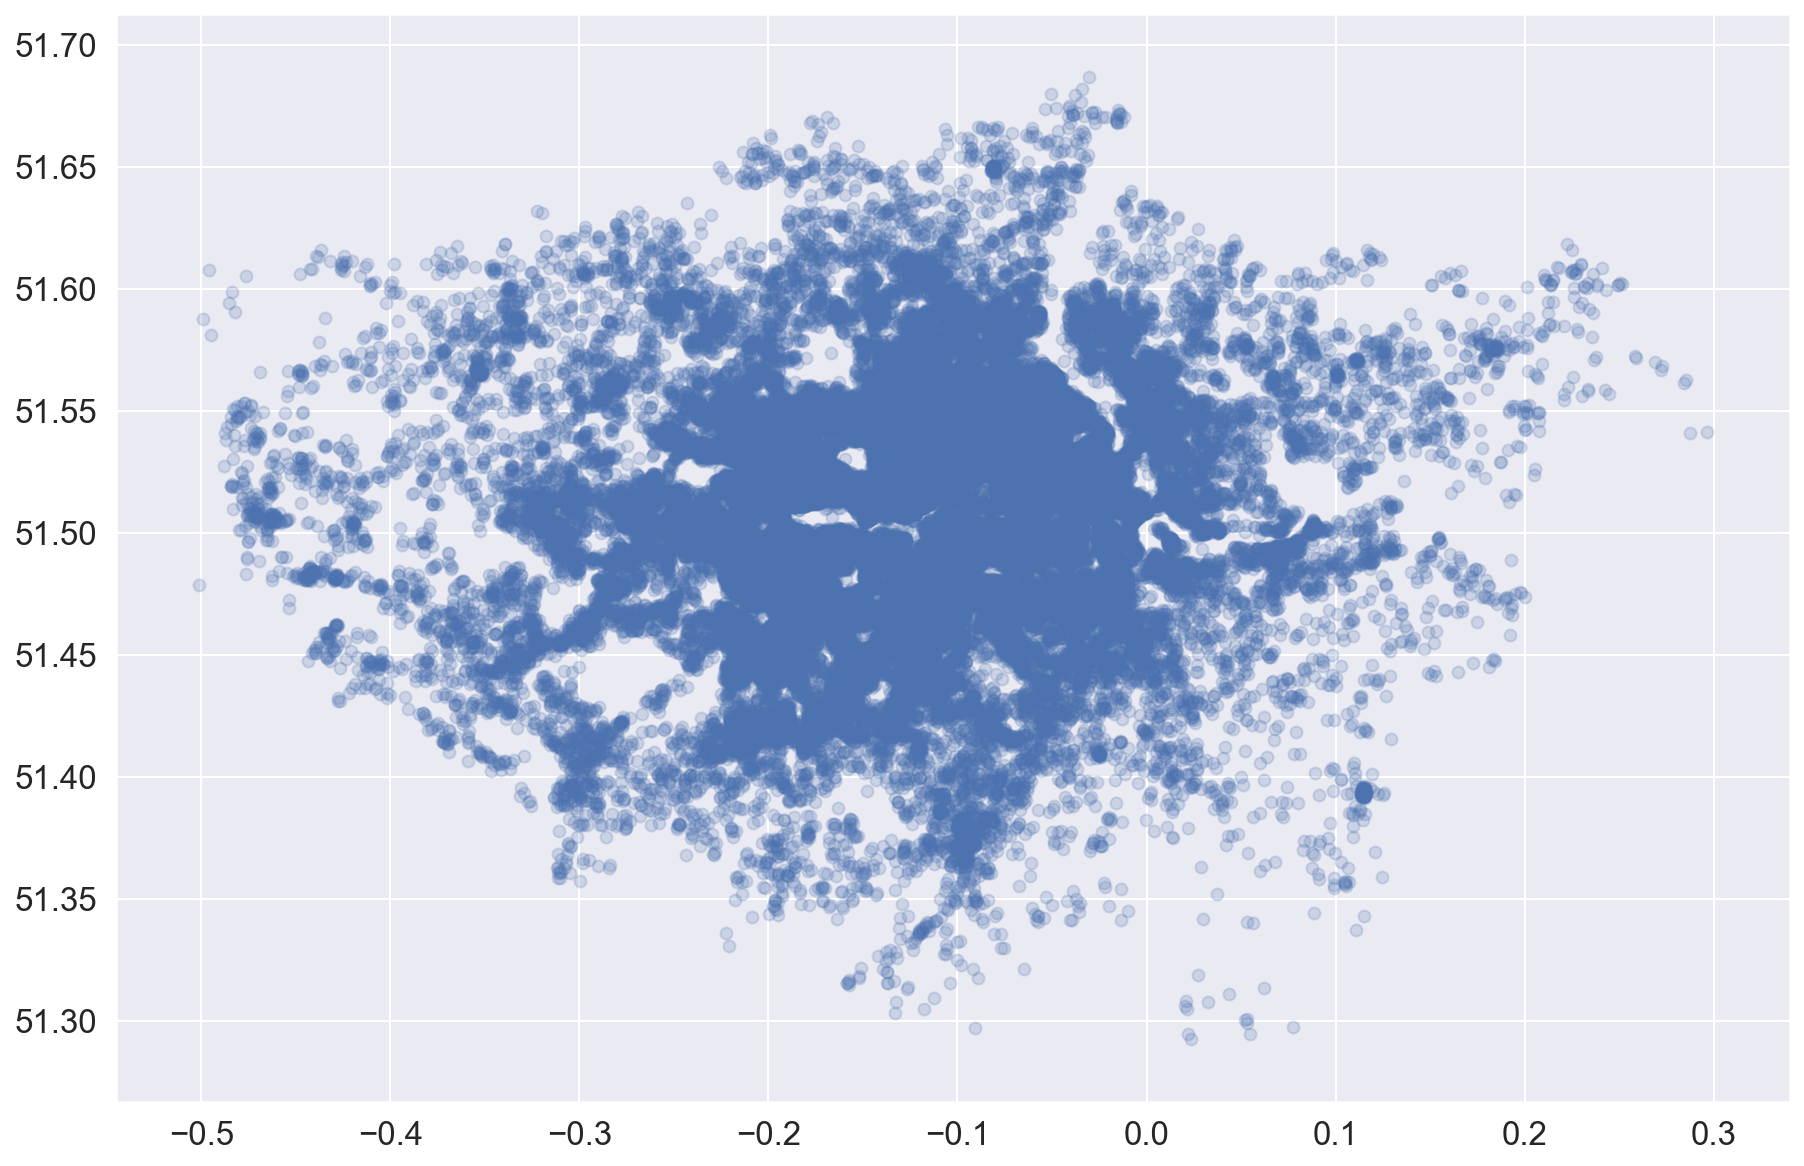

In [60]:
fig, ax = plt.subplots(figsize=(15,10))

plt.scatter( data=mapping_df, x='longitude', y='latitude', alpha=0.2)

#data plotted on long and lat of the properties. Kinda looks like London a little.

I belive location will have a significant impact on the price of an AirBnB listing, as more central location are likley to be higher due to the proximity to tourist arraction and transport links. 

The high number of Westminster and Tower Hamlets which could impact the results when it comes to places which have the most impact.

Looking at the plot we can see that there is a high density of AirBnB's in central London.

## Accomodate

If we think about house prices in general, the more people it accomodates its likley the price will increase. This would be the same for hotels, the more people you book a room for the higher the price. 



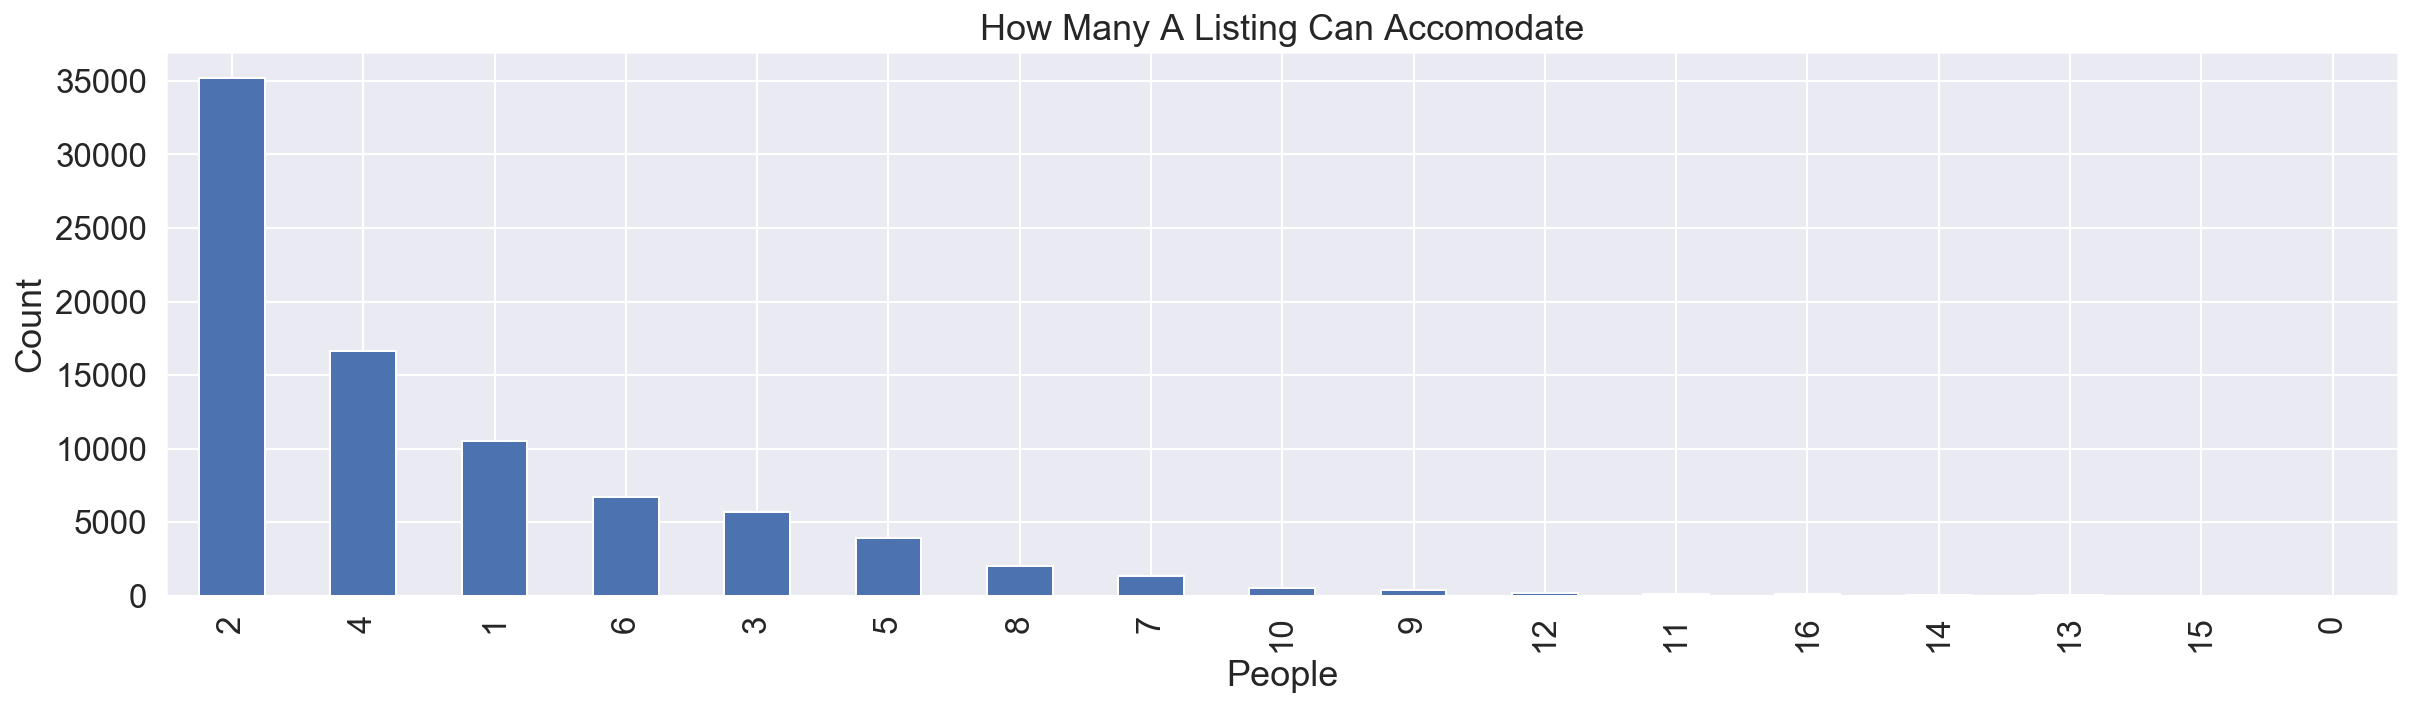

In [30]:
test_df.accommodates.value_counts().plot(kind='bar', figsize=(20, 5))
plt.title("How Many A Listing Can Accomodate")
plt.xlabel("People")
plt.ylabel("Count")
plt.savefig("../Capstone_Images/Accomodates.png", dpi=200, bbox_inches="tight")
plt.show()

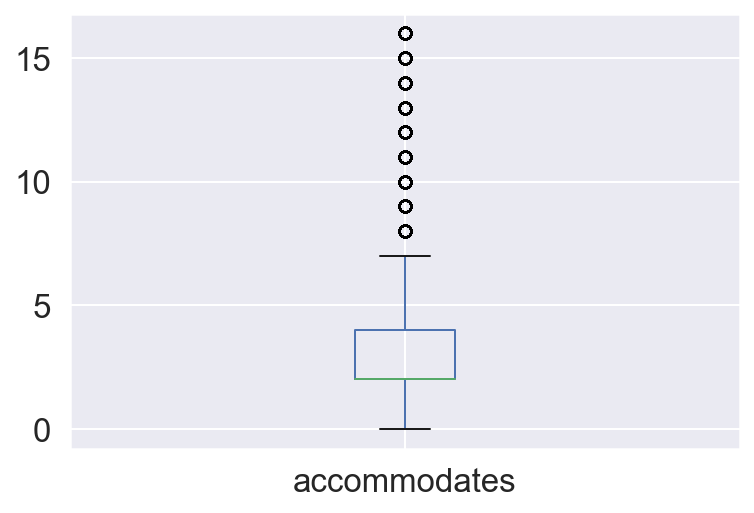

In [62]:
test_df.accommodates.plot(kind='box');

In [55]:
test_df.accommodates.describe()

count    83553.000000
mean         3.188838
std          2.013617
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

We can see from the plots and description above, that a large number of properties accomodate between 2-4 people. As we have seen above a lot of the properties are in central London which would make it unliekly that they would be on average particlualy large. Due to the nature of the properties in those areas, they are often flats or small houses which would make it unlikely that they would sleep more than 4 people. 

## Beds & Bedrooms

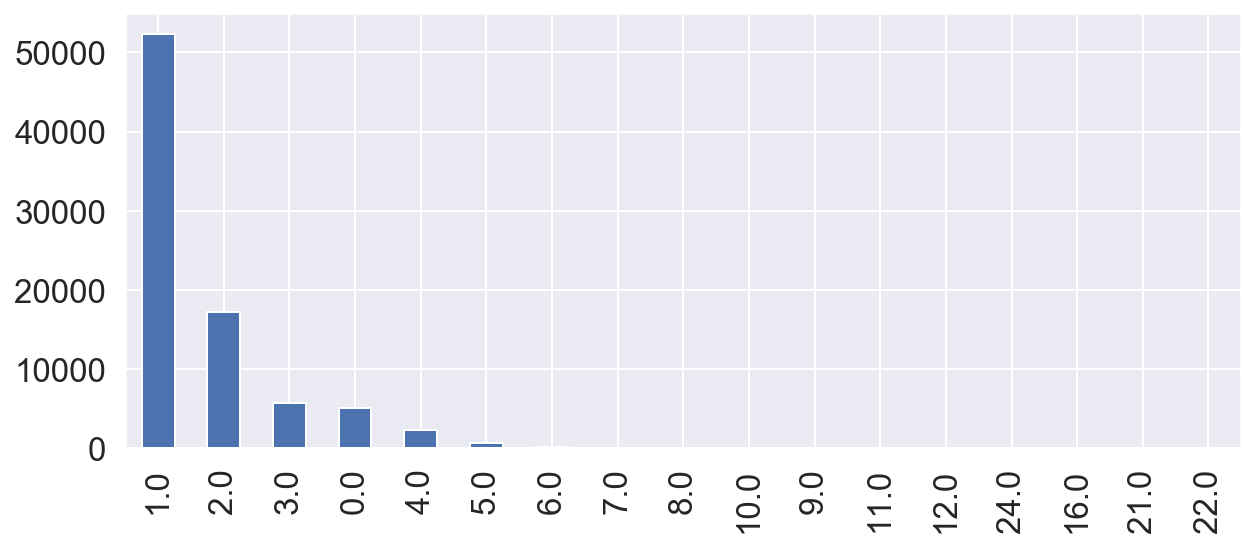

In [31]:
test_df['bedrooms'].value_counts().plot(kind='bar', figsize=(10,4));

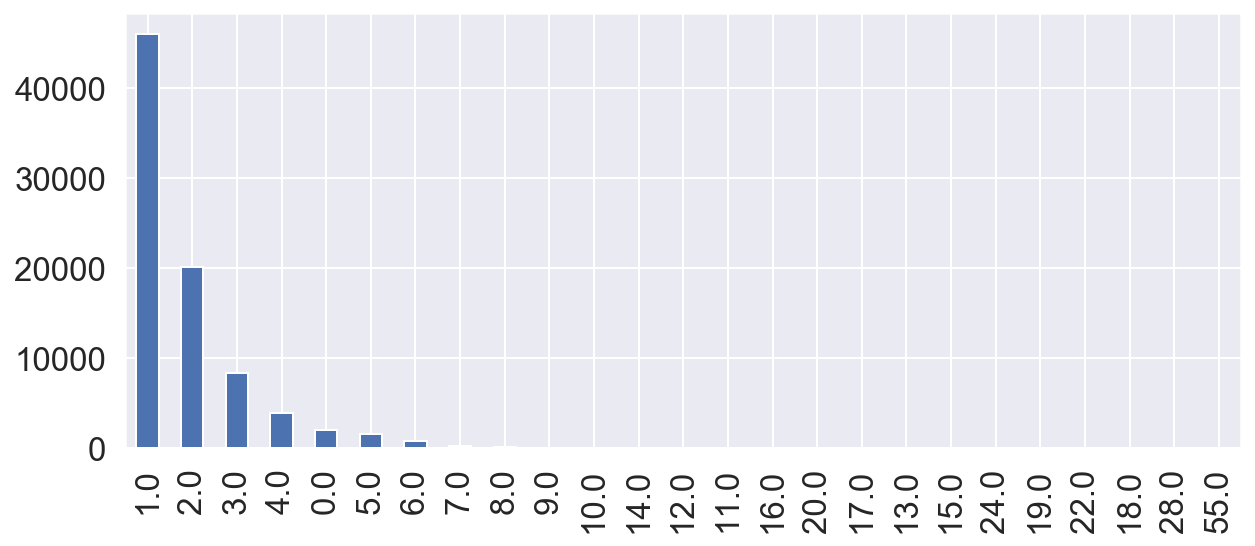

In [32]:
test_df['beds'].value_counts().plot(kind='bar', figsize=(10,4));

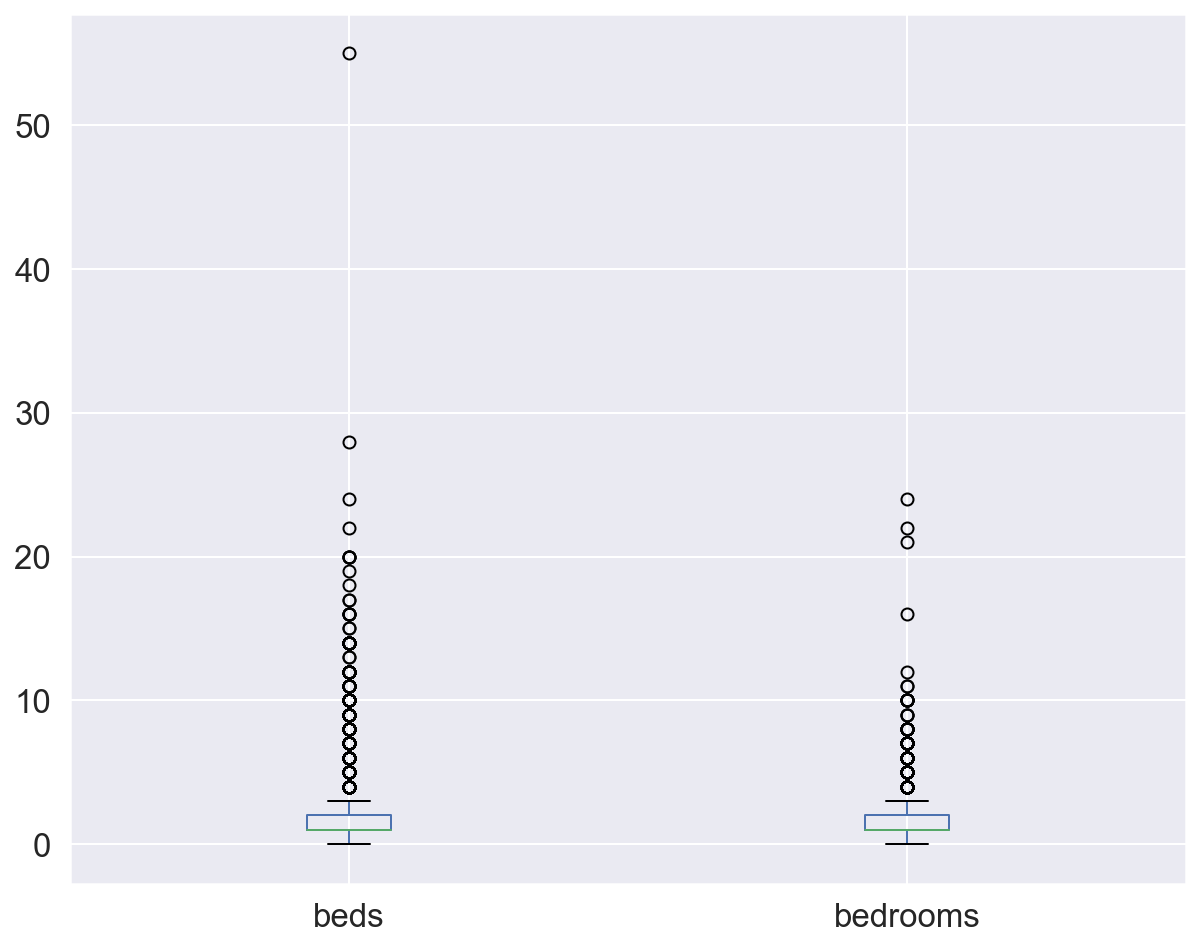

In [50]:
test_df.boxplot(column=['beds', 'bedrooms'],figsize=(10,8));


In [51]:
test_df.beds.describe()

count    83553.000000
mean         1.750087
std          1.284755
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         55.000000
Name: beds, dtype: float64

In [52]:
test_df.bedrooms.describe()

count    83553.000000
mean         1.415329
std          0.926849
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         24.000000
Name: bedrooms, dtype: float64

## Property Type

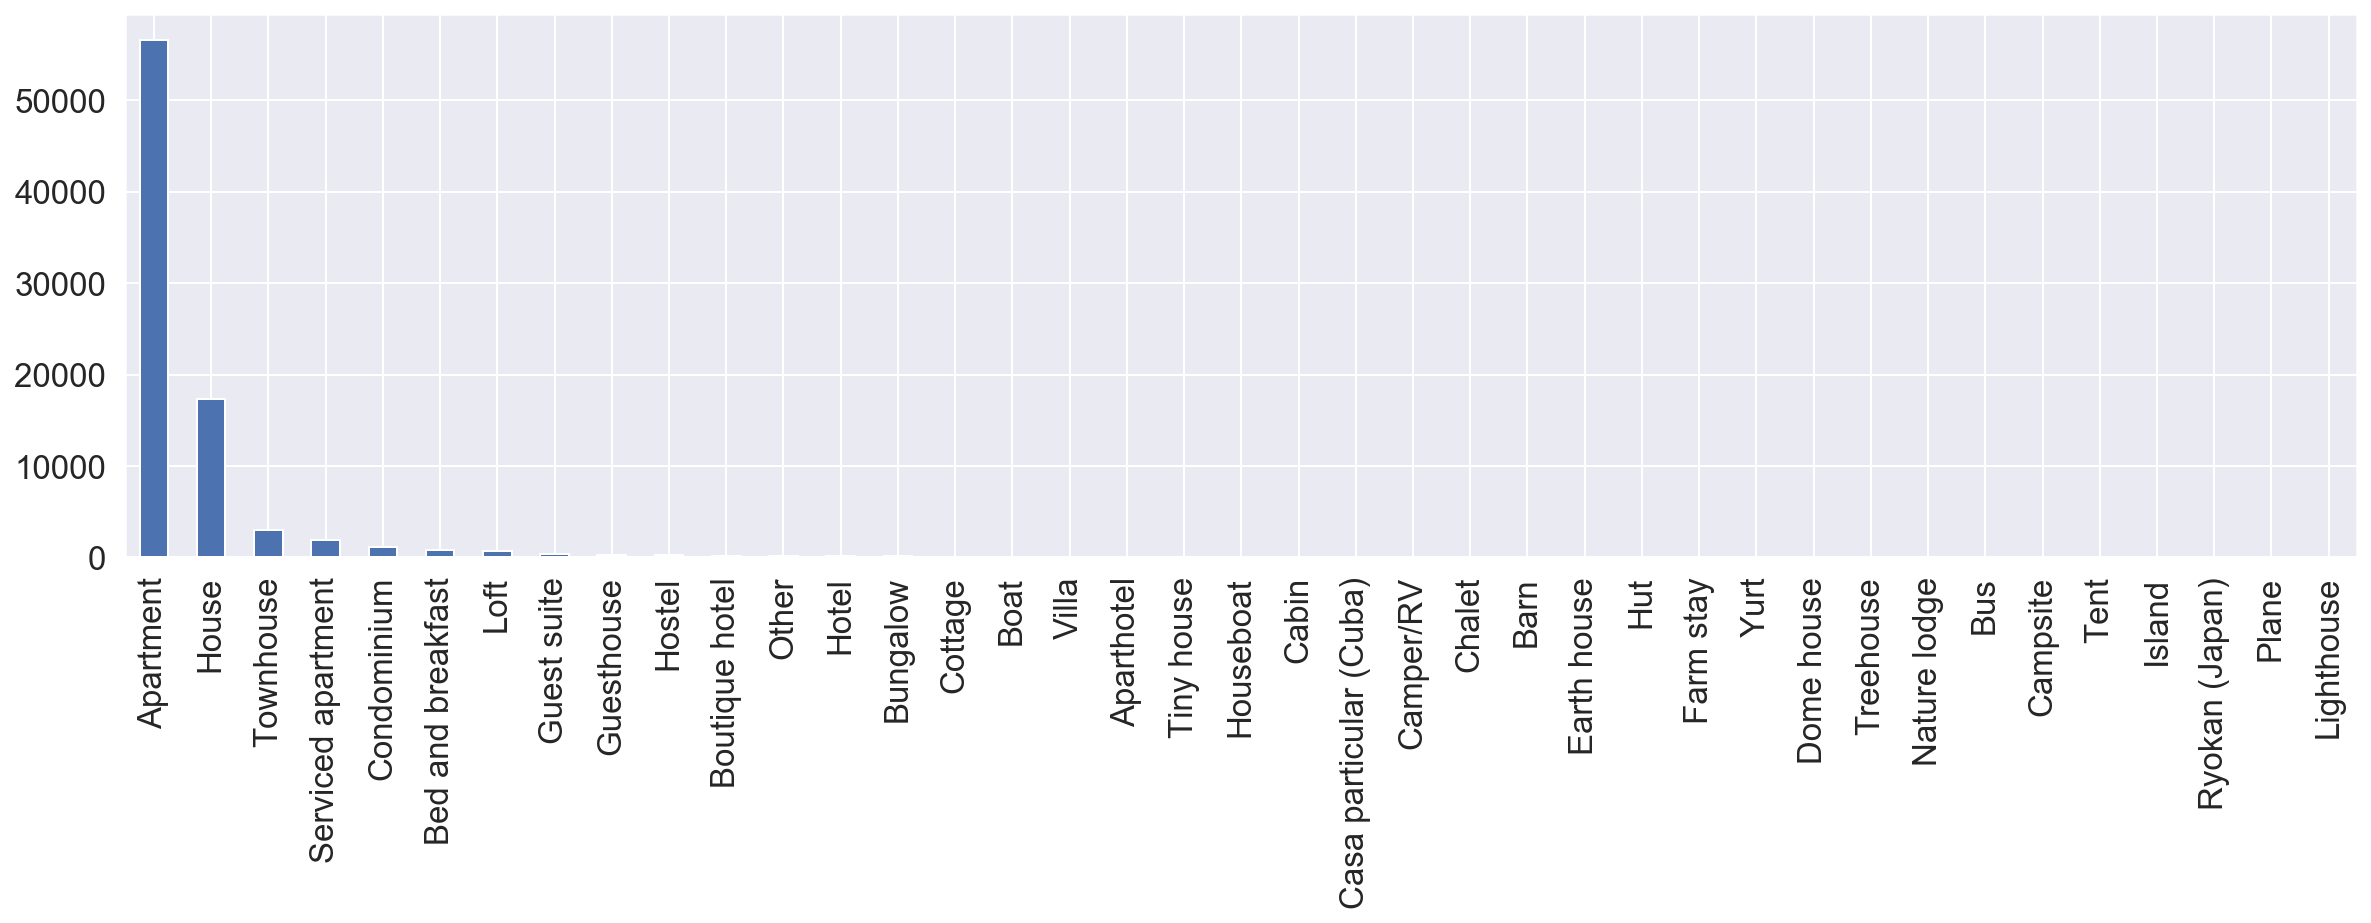

In [53]:
test_df['property_type'].value_counts().plot(kind='bar', figsize=(20,5))
plt.savefig("../Capstone_Images/Property_type_count.png", dpi=200, bbox_inches="tight")
plt.show()

In [82]:
test_df.room_type

0           Private room
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
83548    Entire home/apt
83549    Entire home/apt
83550    Entire home/apt
83551    Entire home/apt
83552    Entire home/apt
Name: room_type, Length: 83553, dtype: object

We can see that we have a large number of different property types, with some unsual properties included. This could explain why we have a number of properties which have bedrooms at 0. 

The highest property types are Apartment and House, this is something which we would expect with the nature of most houses and properties in London falling under this category. 


## Correlation

In [54]:
test_df.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
83548    83845
83549    83846
83550    83847
83551    83848
83552    83849
Name: Unnamed: 0, Length: 83553, dtype: int64

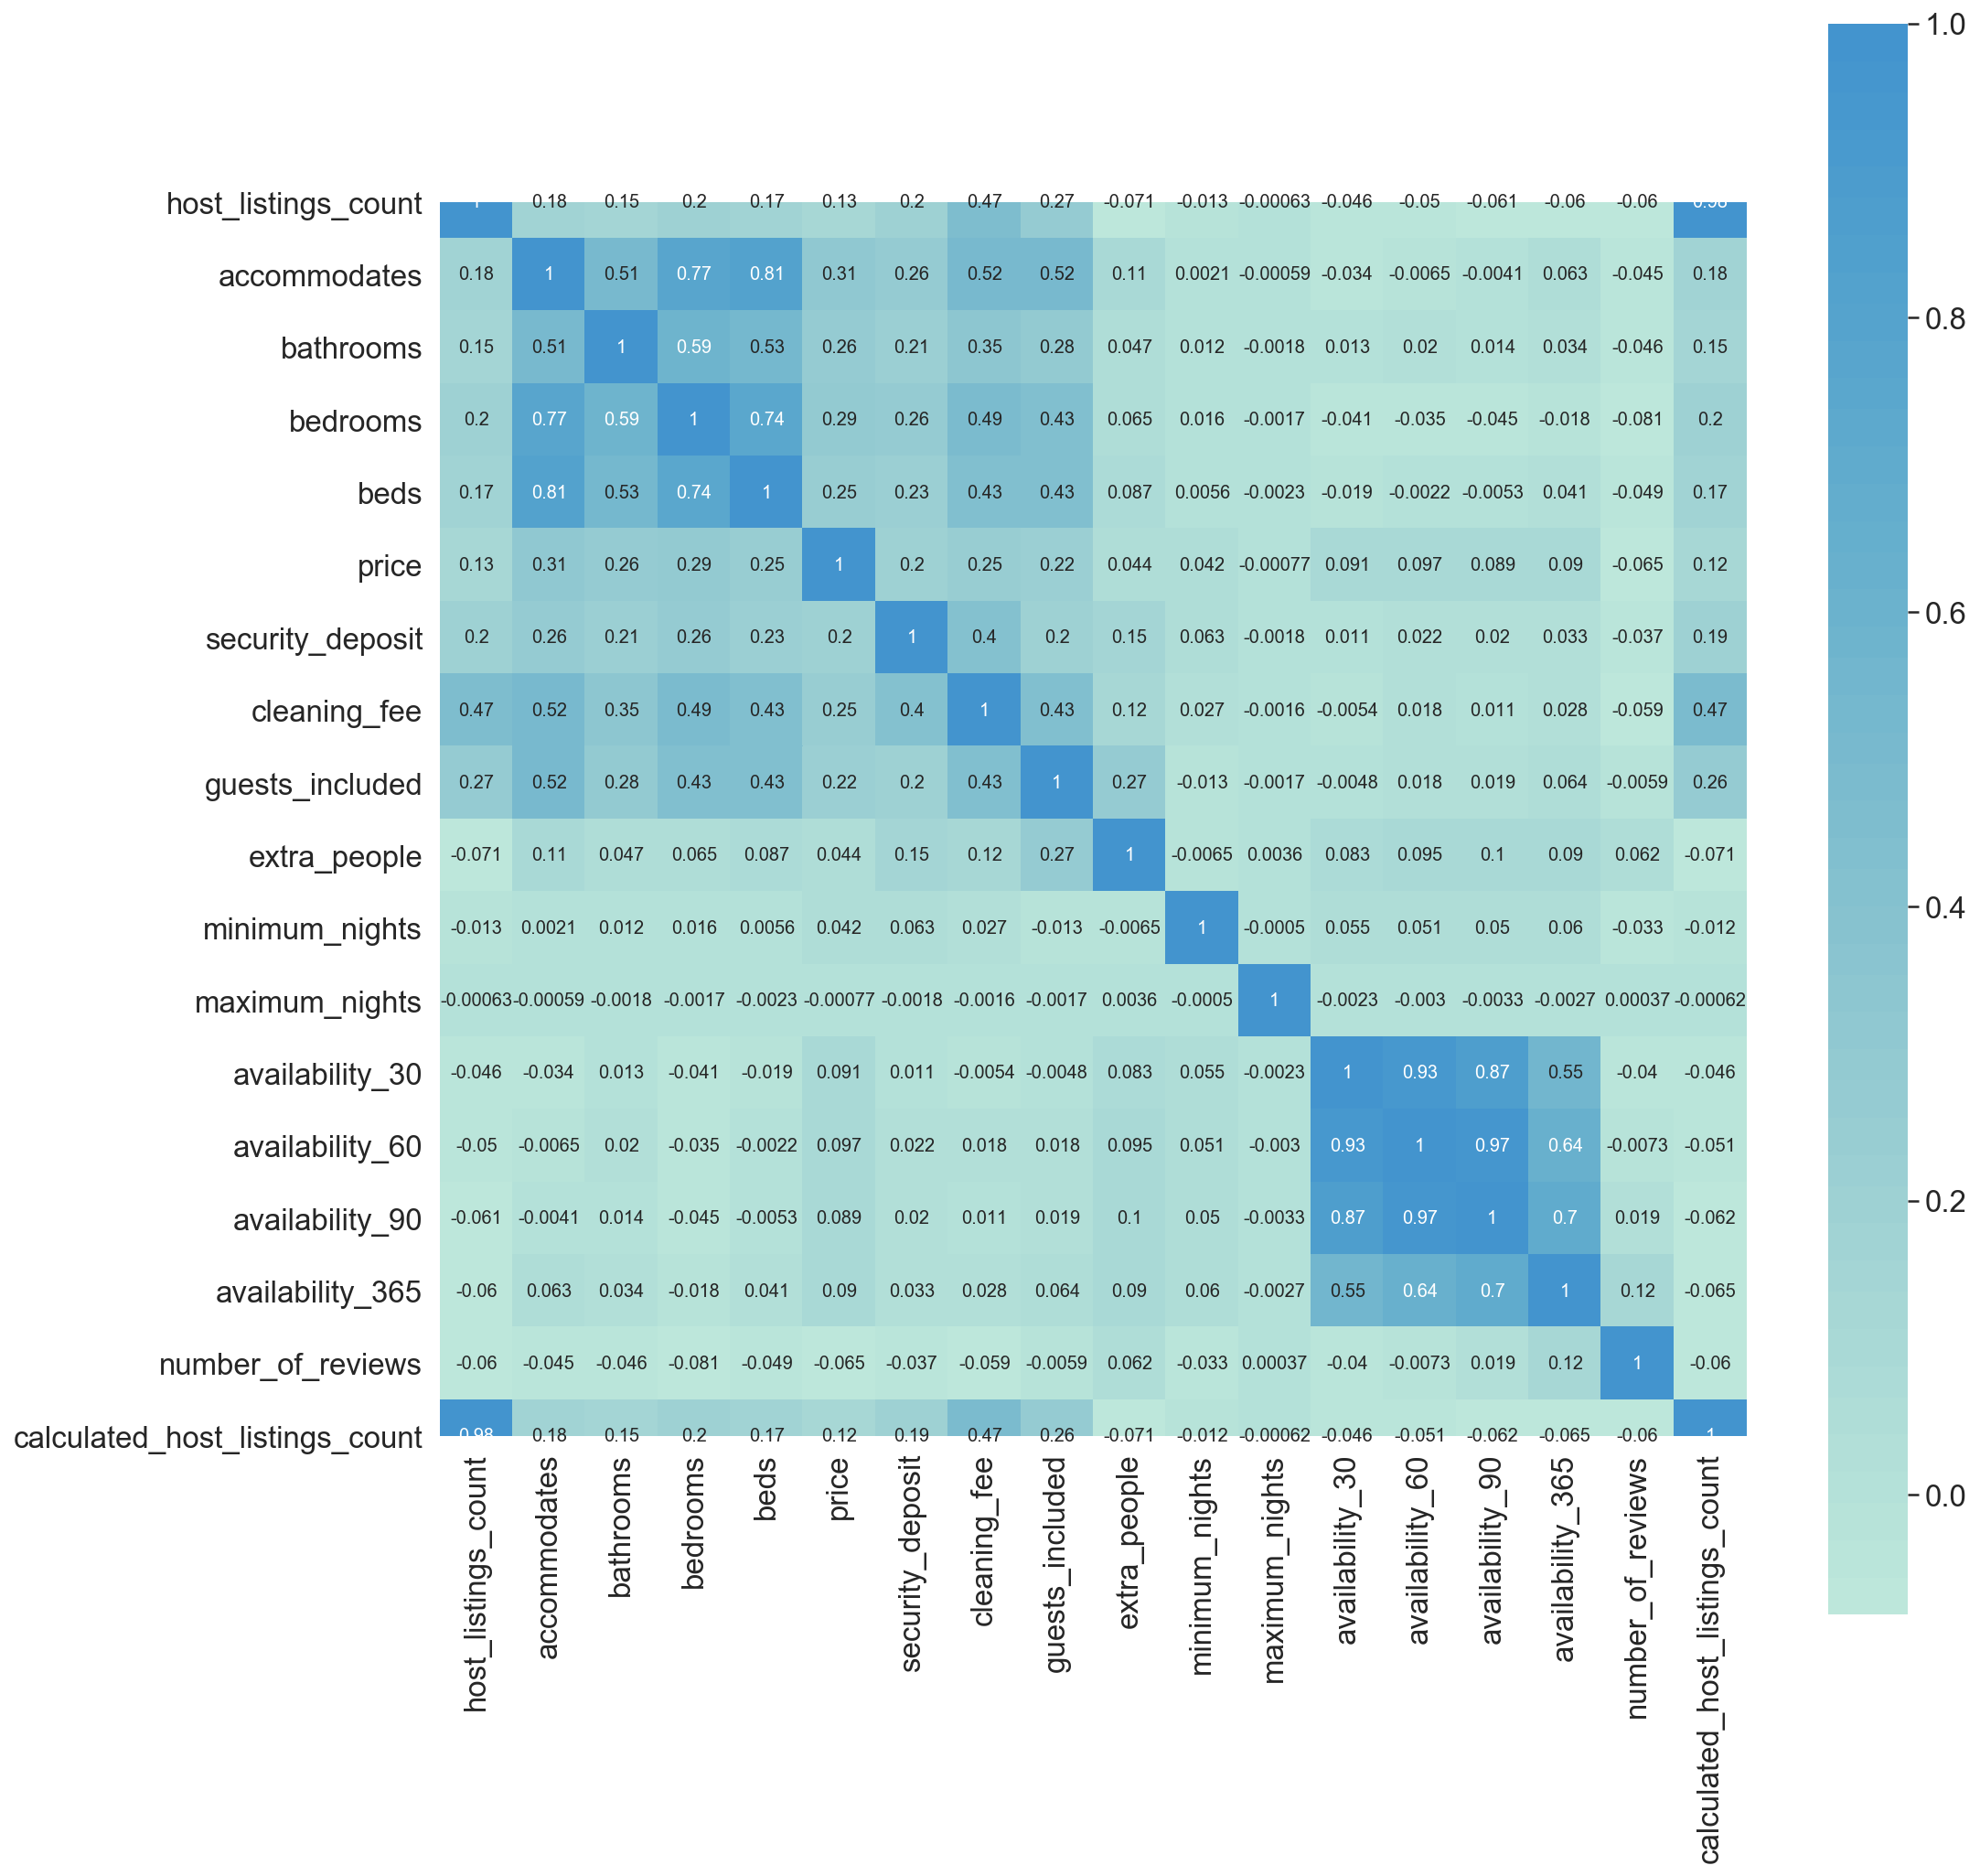

In [55]:
plt.figure(figsize=(16, 16))
sns.heatmap(test_df.corr(), annot=True, center=3,square=True)
plt.show()

### Summary of Correlation


A lot of the varaibles as little or no correlation between them. This is the case for listing price, as there is limited correlation with a lot of the other variables. There is a correaltion with accomdates, beds, bedrooms, cleaning fee and scerutiy deposit. These are varaibles you would expect to have some form of correlation, as the number of beds and how many people will sleep in it will more than likely drive up the price.

Some varaibles do have a high correlation such as beds and accomodates, which is expected. Other varaibles such as thoses based around avaliabilty will naturally have a high correlation as they express similar values.

I will have to be careful when modelling and if I remove any features. If they are highly correlated this could effect the coeffiecents and the model score. 

## Distribution of features

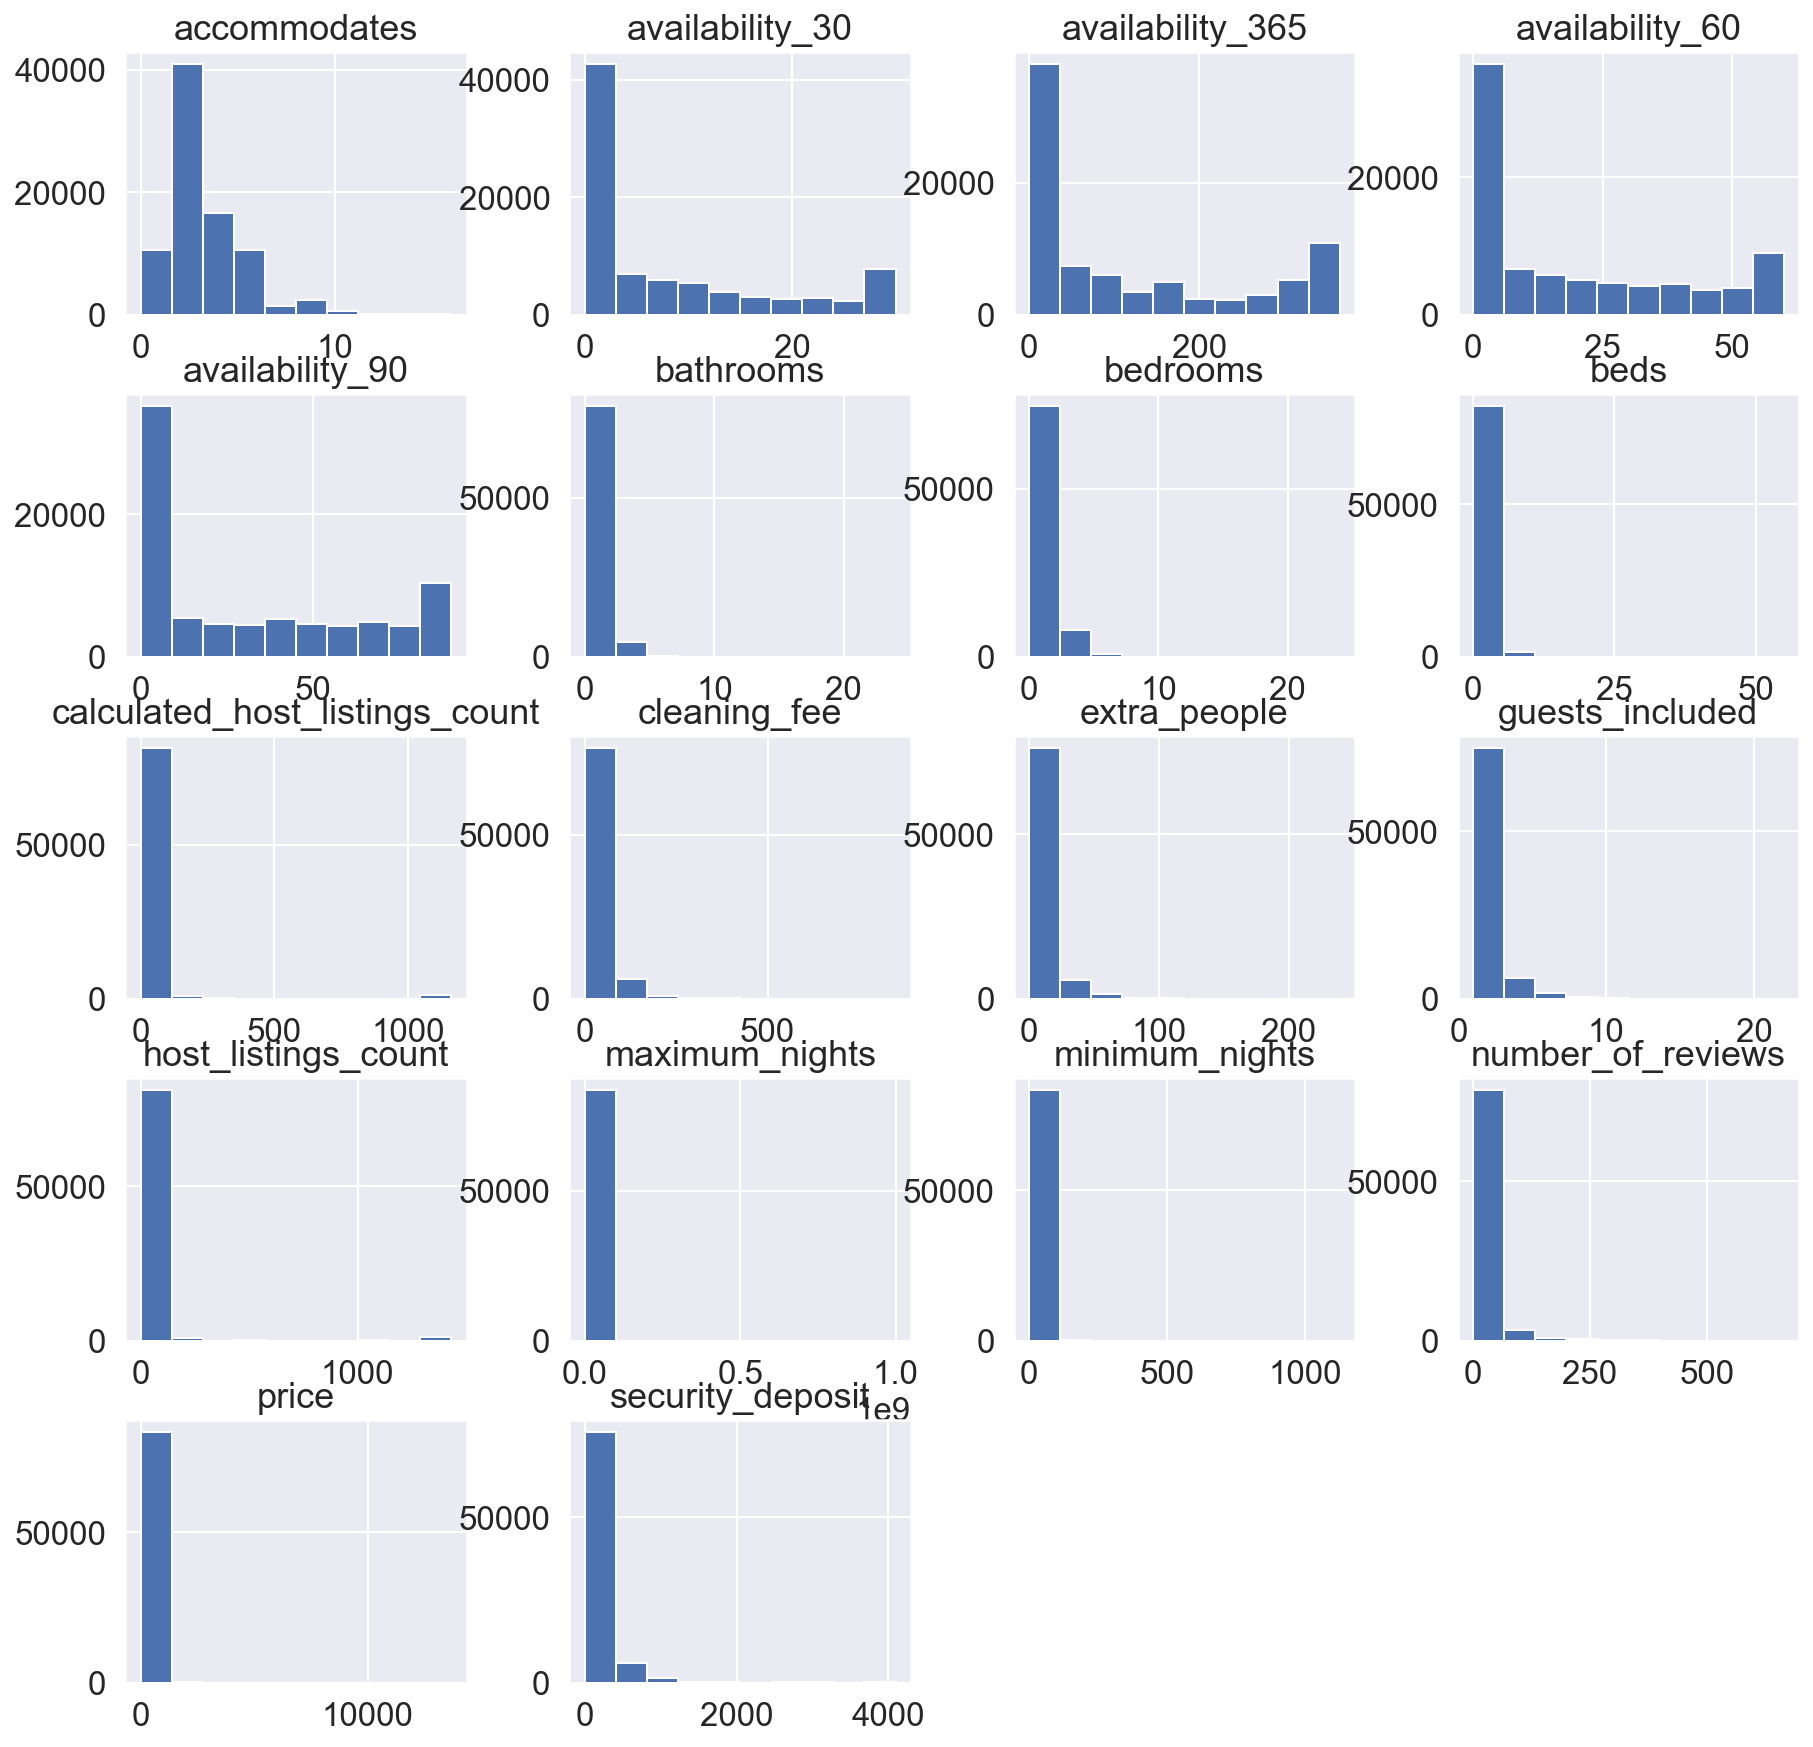

In [56]:
test_df.hist(figsize=(15, 15))

plt.show()

## Intial look at the relationship between price and the selected varaibles

In [57]:
y = test_df['price']

In [58]:
test_df.columns

Index(['experiences_offered', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count'],
      dtype='object')

In [59]:
test_df.dtypes

experiences_offered                object
host_is_superhost                  object
host_listings_count               float64
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
price                             float64
security_deposit                  float64
cleaning_fee                      float64
guests_included                     int64
extra_people                      float64
minimum_nights                      int64
maximum_nights                      int64
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                 

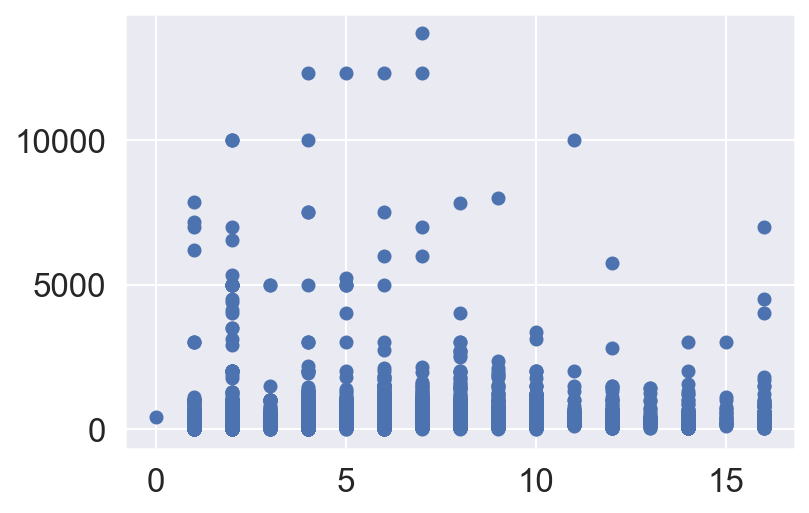

In [60]:
plt.scatter(data=test_df, x='accommodates', y='price')

In [61]:
# no correlation between these data points

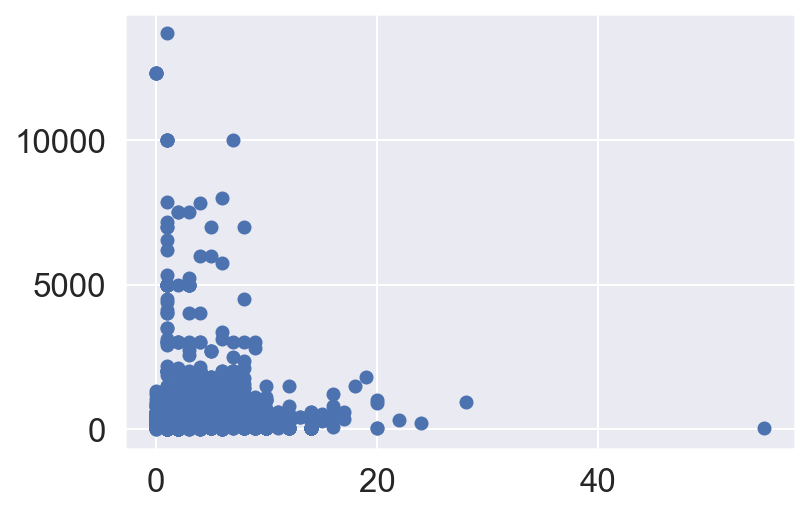

In [62]:
plt.scatter(test_df['beds'],test_df['price'])


In [63]:
# limited correlation between the two, this could be due to the spread of data for beds

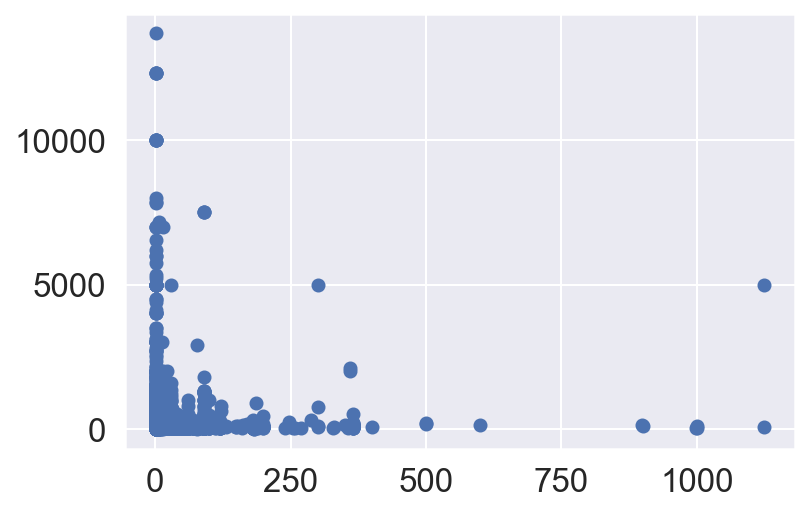

In [64]:
plt.scatter(x=test_df['minimum_nights'], y=test_df['price'])

In [65]:
# limited correlation between the two, this could be down to the large low number count and spread of data

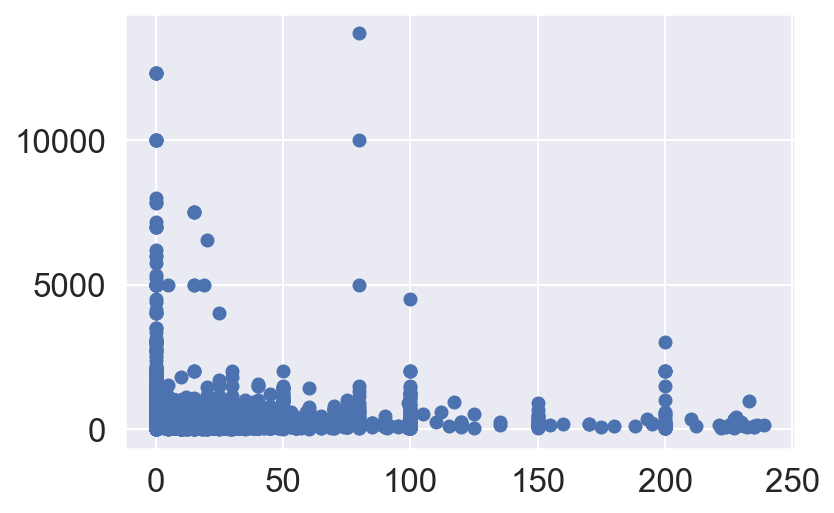

In [66]:
plt.scatter(test_df['extra_people'],test_df['price'])


In [67]:
# hard to tell if there is a correlation, but this could be down to the spread of the data.

# Dummy Varaibles

In [68]:
final_df = pd.get_dummies(test_df, drop_first=True)

In [69]:
final_df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,...,bed_type_Real Bed,requires_license_t,instant_bookable_t,cancellation_policy_luxury_moderate,cancellation_policy_luxury_super_strict_95,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,4.0,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,...,1,0,0,0,0,1,0,0,0,0
1,1.0,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,...,1,0,0,0,0,0,0,1,0,0
2,19.0,6,2.0,3.0,3.0,300.0,350.0,65.0,4,10.0,...,1,0,1,0,0,0,0,1,0,0
3,2.0,2,1.5,1.0,1.0,175.0,250.0,70.0,2,0.0,...,1,0,0,0,0,1,0,0,0,0
4,1.0,4,1.0,2.0,2.0,65.0,250.0,50.0,2,11.0,...,1,0,0,0,0,1,0,0,0,0


In [70]:
#final_df.to_csv('Non_log AirBnB',index=True )

# Summary





## Next Steps

First steps will be to log transform the price data so that it is normally distributed. I have done this below and visulised the realtionship with some choosen varaibles. By creating a normal distribution it will allow me to run a linear regression model more effectively, however I will need to be careful when transfering these results back to the orginal data. As the coefficents will show the movement based on the log of the orignal data.

As I have data that is dummyfied and ranging across a number of different varaibles, I will standardize the data when modeling. 

Due to the large number of columns I may have to remove some columns during modeling, if I am to do this then I will need to be careful that the varaible is not highly correlated to another as this could effect the coeffiecnts that are produced. 


# Log and vis the variables

In [71]:
final_df['price'] = np.log1p(final_df['price'])
#final_df['price'] = np.log(final_df['price'])
#final_df['price'] = np.log10(final_df['price'])

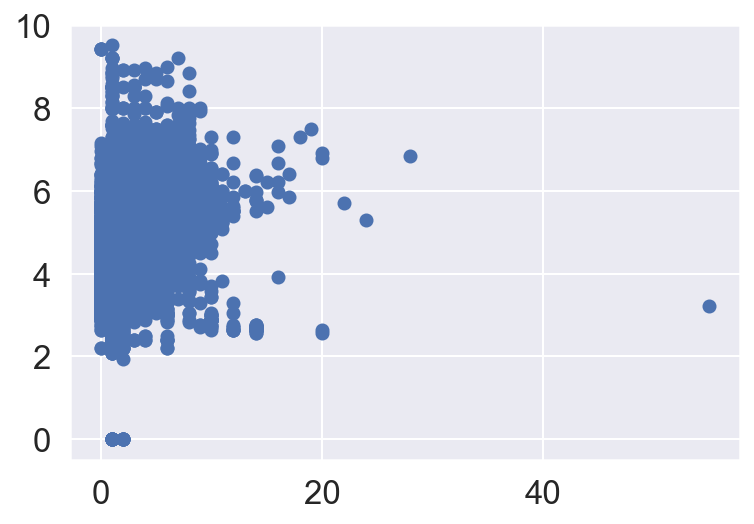

In [72]:
plt.scatter(final_df['beds'],final_df['price'])

In [73]:
# correltion clearer

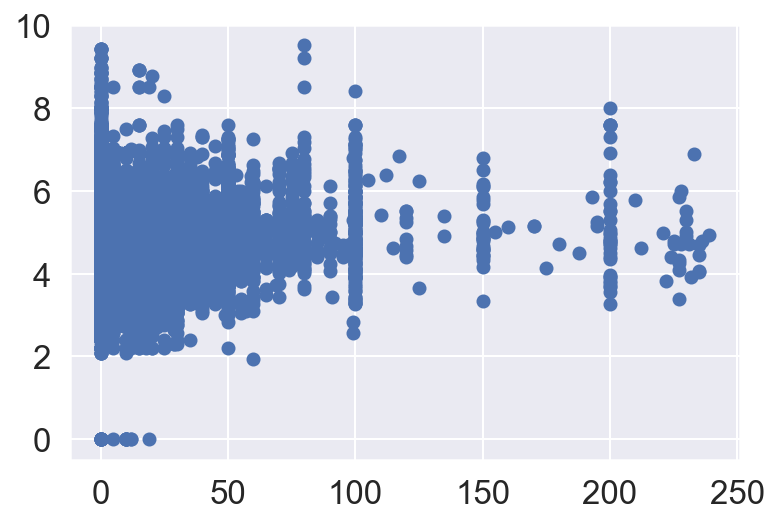

In [74]:
plt.scatter(final_df['extra_people'],final_df['price'])

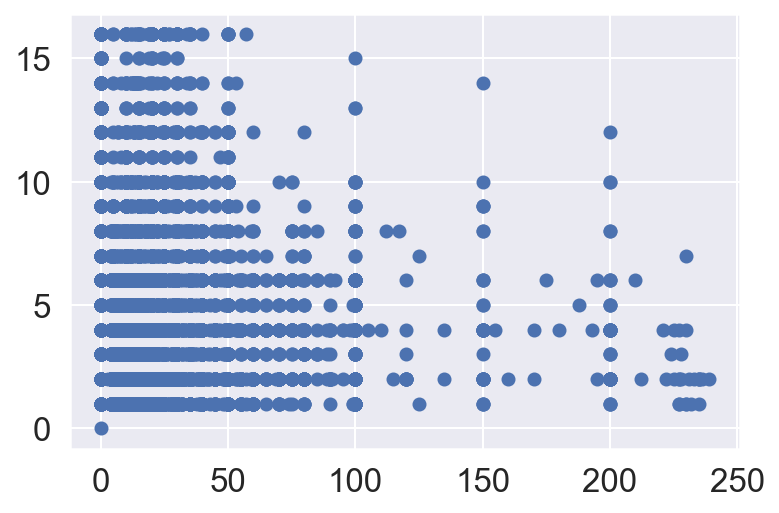

In [75]:
plt.scatter(final_df['extra_people'],final_df['accommodates'])

In [76]:
final_log_df = final_df

In [77]:
#final_log_df.to_csv('log_AirBnB',index=True )

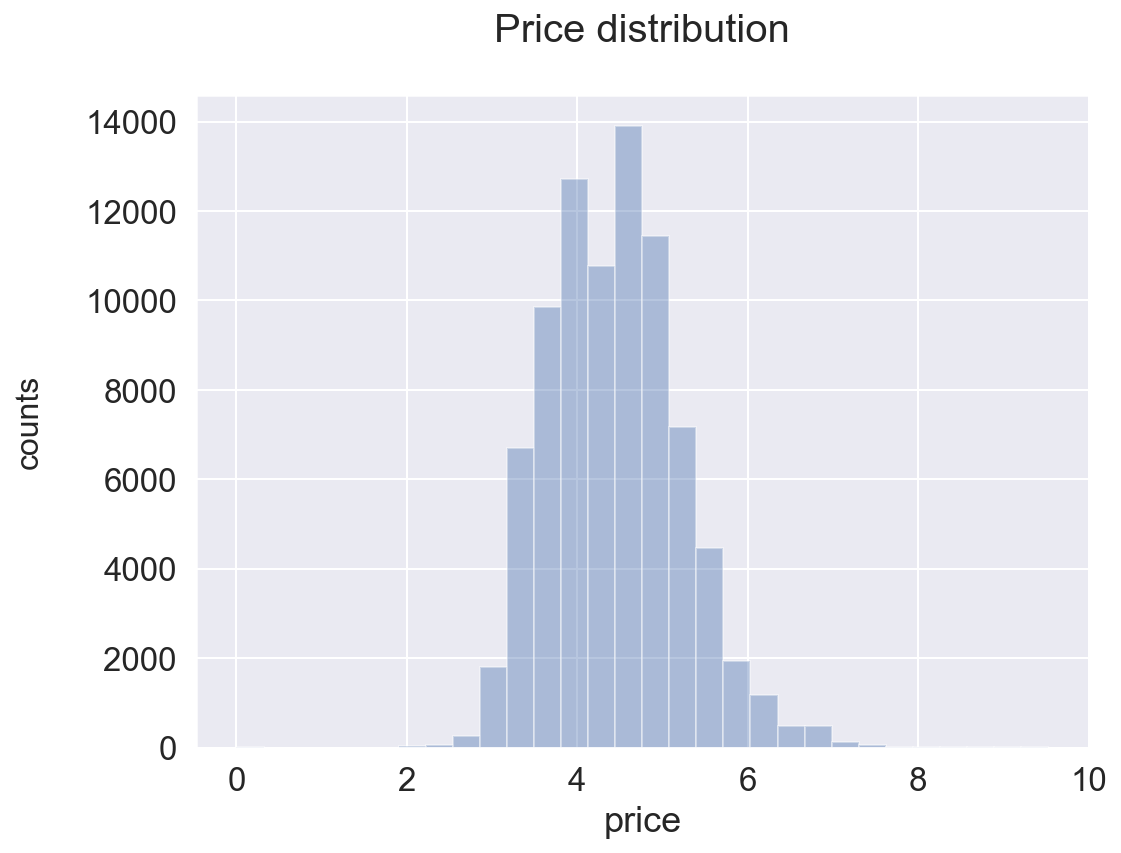

In [80]:
#distiribution of the price data
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(final_log_df['price'], bins=30, kde=False)
ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Price distribution\n', fontsize=20)
plt.savefig("../Capstone_Images/price_norm.png", dpi=200, bbox_inches="tight")
plt.show()